<h1>Matplotlib Architecture</h1>

**1. Backend layer**
--> Deals with rendering of plots to screen or files

--> In jupyter notebook we use inline backend

**2. Artist layer**
--> Contains containers such as Figure, Subplot and Axes

--> Contains premitives, such as Line2D and Rectangle, and collections (Path Collection)

Matplotlib is heavly related with axis object which pural from is axes

**3. Scripting layer**

--> Simplifies the access to the Artist and Backend layers

In [1]:
#use to see figure and save the figure
%matplotlib notebook 

In [2]:
import matplotlib.pyplot as plt
#plt.plot? #doc-string

<IPython.core.display.Javascript object>


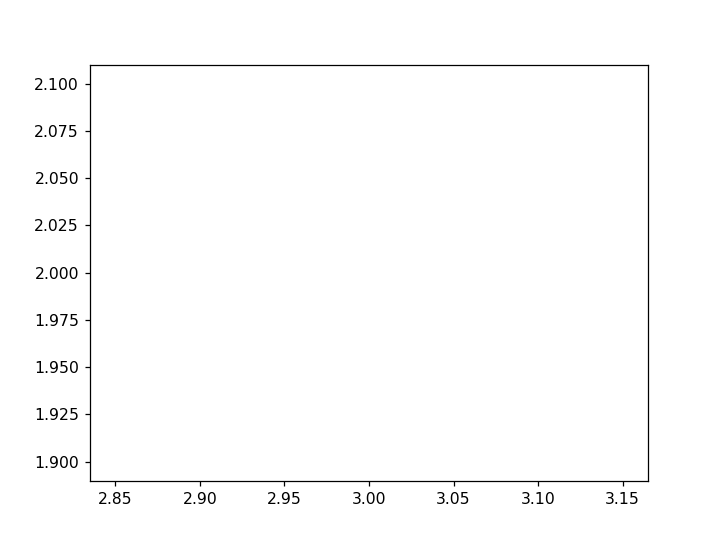

In [3]:
plt.plot(3,2)
#note: datapoint is not showing in the figure

In [5]:
plt.plot(3,2, '.')

# Scripting Layer

In [4]:
from matplotlib.backends.backend_agg import FigureCanvasAgg

from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvasAgg(fig)

ax = fig.add_subplot(111)
ax.plot(3,2, '.')

canvas.print_png('test.png')


note: we need to save it in png format to see the file after scripting

In [5]:
%%html

<img src="test.png"/>

# GCA and AXIS Function
We can do the polting by GCA and Axis Function

<IPython.core.display.Javascript object>


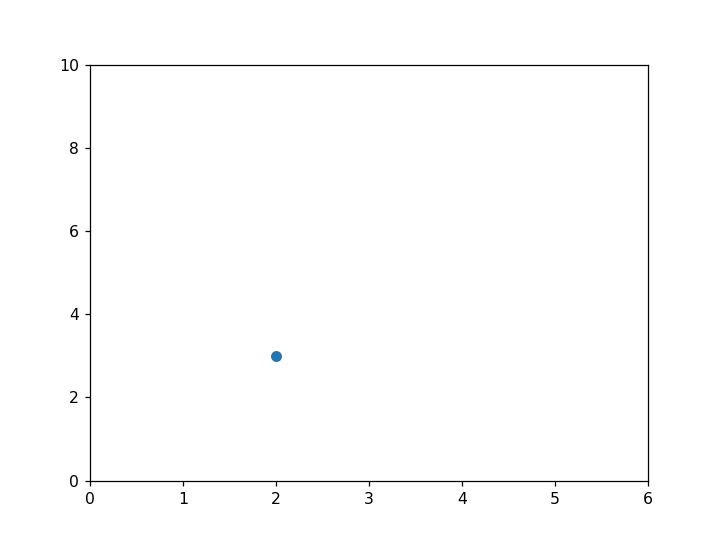

[0, 6, 0, 10]

In [6]:
plt.figure()
plt.plot(2,3, 'o')
ax = plt.gca()
ax.axis([0,6,0,10]) #X an Y axis scaling

# plt.plot

there will be more datapoints in figure and show in different colour each datapoint after rendering in backend layer as they have recognized them different series of numbers

<IPython.core.display.Javascript object>


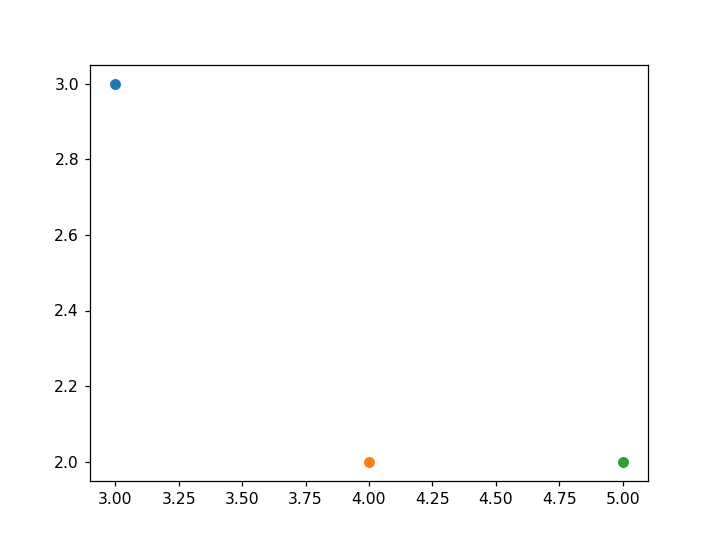

In [7]:
plt.figure()
plt.plot(3,3, 'o')
plt.plot(4,2, 'o')
plt.plot(5,2, 'o')

# Matplotlib Pyplot Properties

**args** --> any number of unnamed argument

**kwargs** --> any number of named argument

 1. pyplot will retrieve figure with the function gcf() and axis gca() 

 2. pyplot just mirror the API of Axes Object 

 3. Function declarations end with an openset of keyword arguments. We can control lotof different properties</l1>

# Scatter Plot

<IPython.core.display.Javascript object>


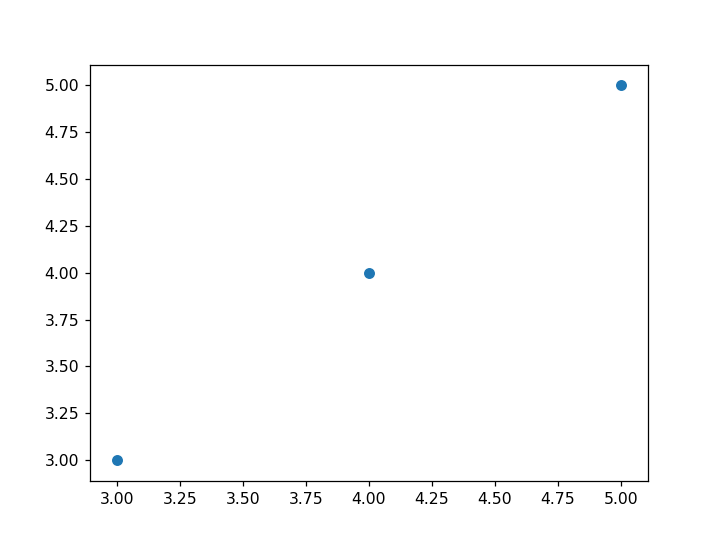

In [8]:
import numpy as np

X = np.array([3,4,5])
Y=X
plt.figure()
plt.scatter(X, Y)

<IPython.core.display.Javascript object>


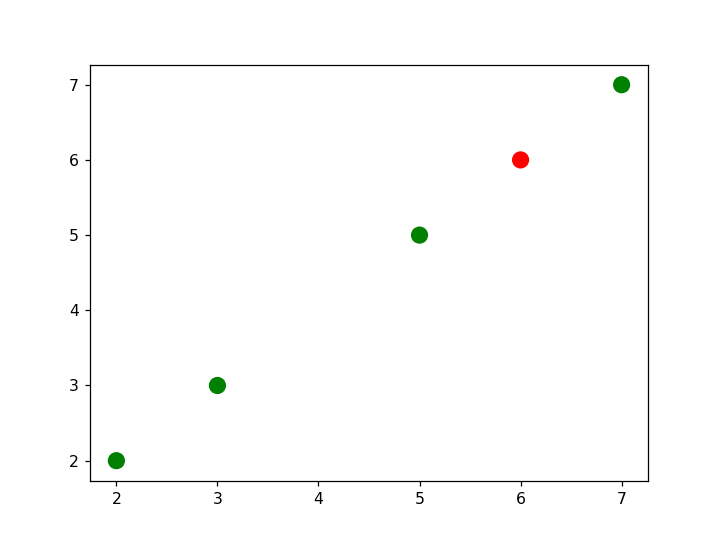

In [9]:
X=np.array([2,3,5,6,7])
Y= X
colors = ['green']*(len(X)-2) #(len(X)-2) for 3rd index color
colors.append('red')
plt.figure()
plt.scatter(X,Y, s= 100, c=colors) #s is a width or size of datapoint

# ZIP
There are two lists (L1 and L2). Zip will take value from each list by index 1 and make it tuple. Then it will take second index value from both lists and make another tuple


In [10]:
l1 = [4, 5, 6, 7, 8] 
l2 = [2,3,4,9,10]
zip_genarator = zip(l1,l2)
list(zip_genarator)

[(4, 2), (5, 3), (6, 4), (7, 9), (8, 10)]

In [11]:
l1 = [1,2,3,4,5]
l2 = [6,7,8,9,10]

zip_generator = zip(l1,l2)
x,y = zip(*zip_generator)

print('value of x :', x)
print('value of y :', y)

value of x : (1, 2, 3, 4, 5)
value of y : (6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


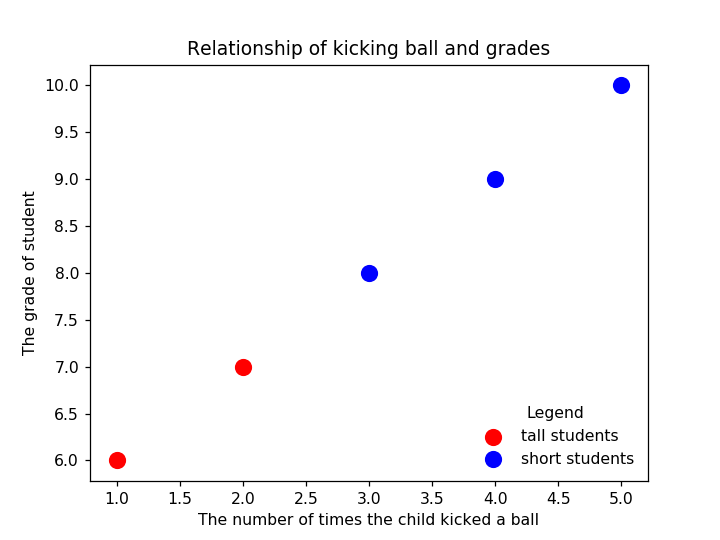

In [12]:
plt.figure()
#splitting values of tuple of x and y in two dataset
plt.scatter(x[:2], y[:2], s= 100, c='red', label ='tall students')
plt.scatter(x[2:], y[2:], s = 100, c='blue', label = 'short students')

In [13]:
plt.xlabel('The number of times the child kicked a ball')
plt.ylabel('The grade of student')
plt.title('Relationship of kicking ball and grades')

In [14]:
plt.legend()

to change the legend position **[bottom right position]**

In [15]:
#to change the legend position **[bottom right position]**
plt.legend(loc=4, frameon = False, title = 'Legend')

<h2>Backend Work</h2>

In [17]:
plt.gca().get_children()

In [18]:
legend = plt.gca().get_children()[-2]

In [19]:
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [20]:
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        print(" " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)
rec_gc(legend)
        

Legend
      Text(0,0,'Legend')
            Text(0,0,'tall students')
            Text(0,0,'short students')
  FancyBboxPatch(470.688,67.2125;169.5x73.125)


# Line Plot and Quadratic Plot

1. in plot, we only use y-axis no x-axis. and plot is prepared the line and use index of **Series** as x-axis
2. plot identifies 2series of data (line and quadratic) and define the color for individual whereas we need to define the **label and color** for scatter plot

<IPython.core.display.Javascript object>


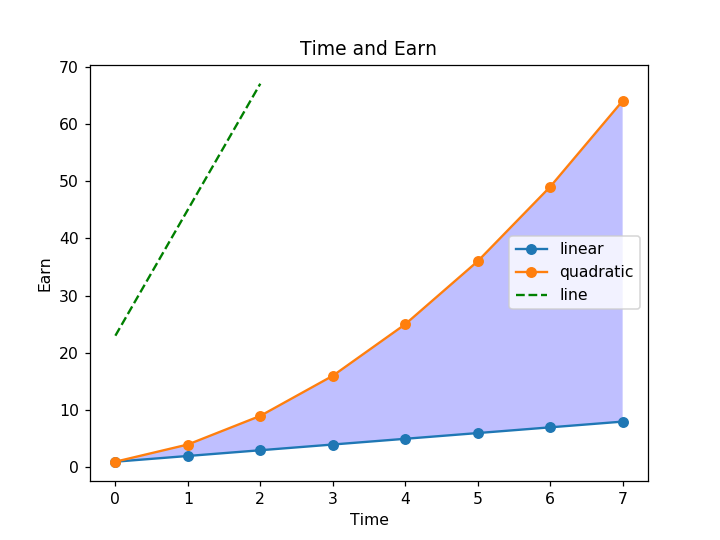

In [21]:
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
quadratic_data = linear_data**2
plt.figure()
plt.plot(linear_data, '-o', quadratic_data, '-o')

In [22]:
plt.plot([23,45,67], '--g')

In [23]:
plt.xlabel('Time')
plt.ylabel('Earn')
plt.legend(['linear', 'quadratic', 'line'])
plt.title('Time and Earn')

# To Highlight the difference between Blue and Green Line 

In [24]:
#deepness of color alpha
plt.gca().fill_between(range(len(linear_data)),
                      linear_data, quadratic_data, 
                      facecolor = 'blue', alpha = 0.25) 

# Decide value for x-axis and y-axis

<IPython.core.display.Javascript object>


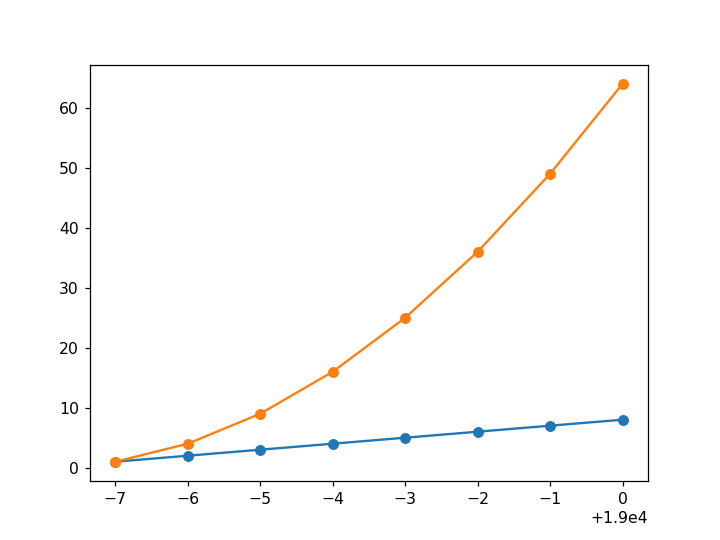

In [25]:
plt.figure()
observing_dates = np.arange('2022-01-01', '2022-01-09', dtype = 'datetime64[D]')
plt.plot(observing_dates, linear_data, '-o', 
        observing_dates, quadratic_data, '-o')

<h3>note: Most crucial part of Data Science is Datetime handling </h3>

# Convert numpy date to libary date

<IPython.core.display.Javascript object>


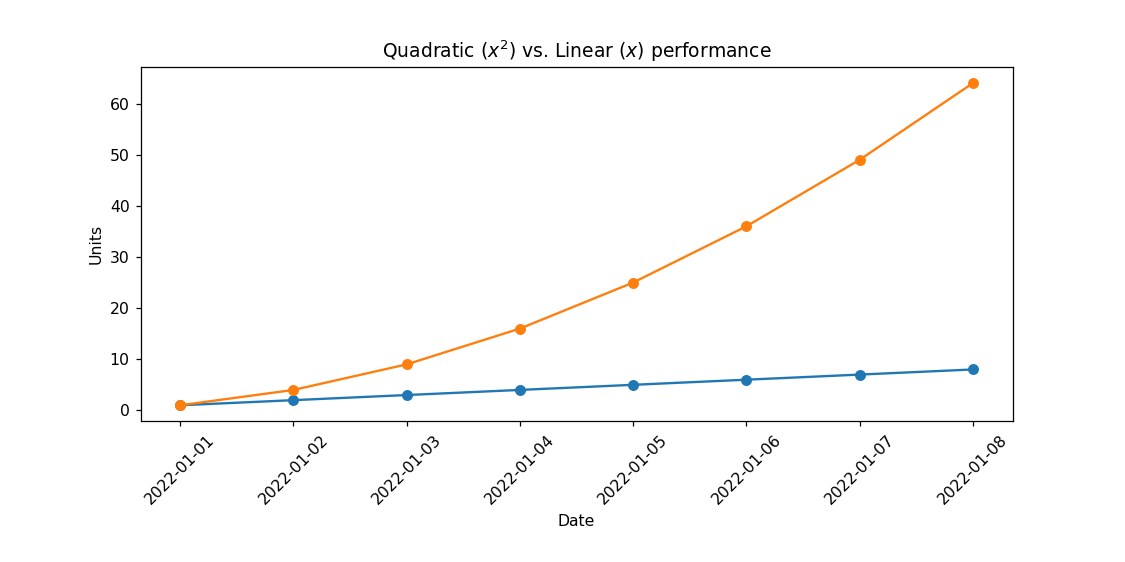

In [26]:
import pandas  as pd
import numpy as np
plt.figure(figsize=(10,5))
observing_date = np.arange('2022-01-01', '2022-01-09', dtype = 'datetime64[D]')
observing_date = map(pd.to_datetime, observing_date)
plt.plot(observing_dates, linear_data, '-o', 
        observing_dates, quadratic_data, '-o')


# X-axis and x_ticklabels Rotation

In [27]:
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)

In [28]:
plt.subplots_adjust(bottom=0.25)

In [29]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Quadratic ($x^2$) vs. Linear ($x$) performance')

# Bar Chart

<IPython.core.display.Javascript object>


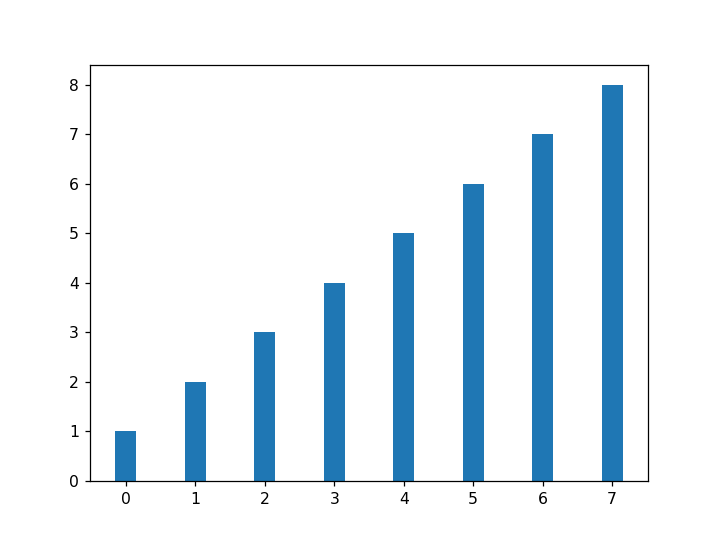

<Container object of 8 artists>

In [30]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

# Dual Bar Chart

<IPython.core.display.Javascript object>


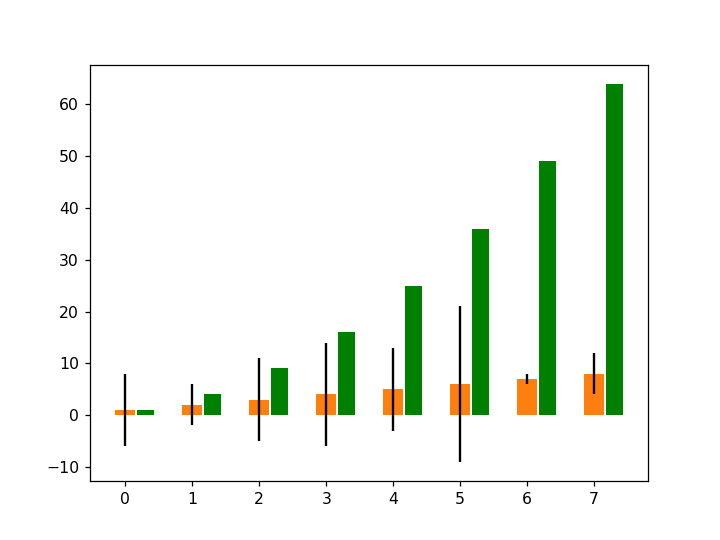

<Container object of 8 artists>

In [31]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

In [32]:
new_xvals = []



for item in xvals:
    new_xvals.append(item+0.3)
    
plt.bar(new_xvals, quadratic_data, width=0.25, color = 'green')


<Container object of 8 artists>

# Stacked Bar-Chart

# Bar Chart with Random Value

In [33]:
from random import randint
linear_err = [randint(0,15) for x in range(len(linear_data))]
plt.bar(xvals, linear_data, width=0.3, yerr=linear_err)

<Container object of 8 artists>

<IPython.core.display.Javascript object>


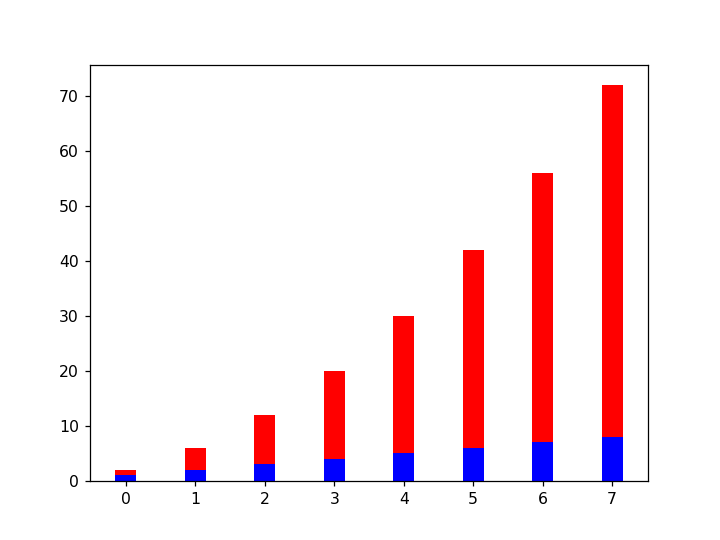

<Container object of 8 artists>

In [34]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width=0.3, color='b')
plt.bar(xvals, quadratic_data, width=0.3, bottom = linear_data, color = 'r')

# Horizontal Bar Graph

<IPython.core.display.Javascript object>


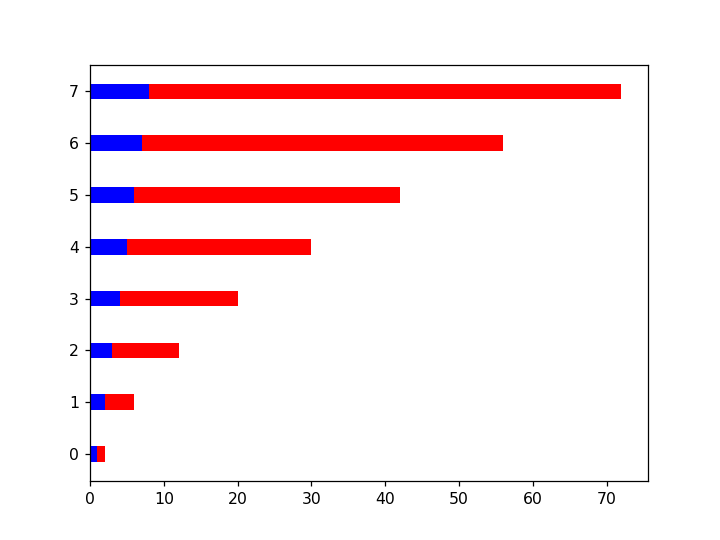

<Container object of 8 artists>

In [35]:
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height=0.3, color='b')
plt.barh(xvals, quadratic_data, height=0.3, left = linear_data, color ='r')

<h3>Scripting layer is a convinient function on top of the object layer.</h3>

# Dejunkifying a Plot

# Remove Labels 

<IPython.core.display.Javascript object>


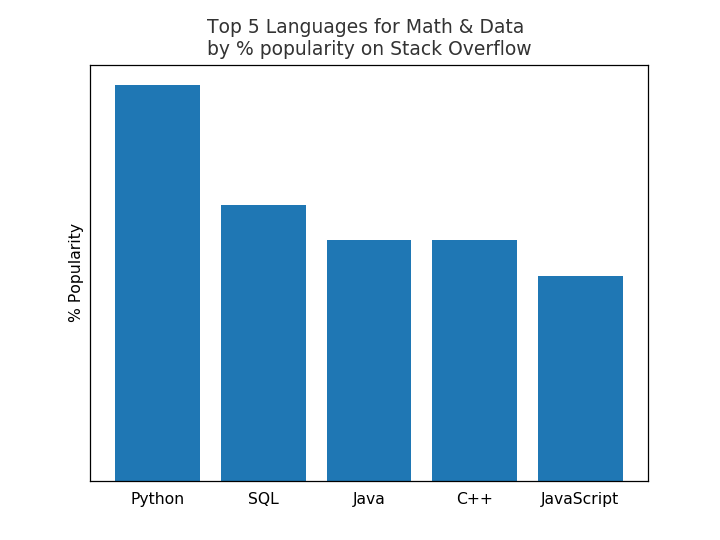

In [36]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.show()

# Remove Frame

<IPython.core.display.Javascript object>


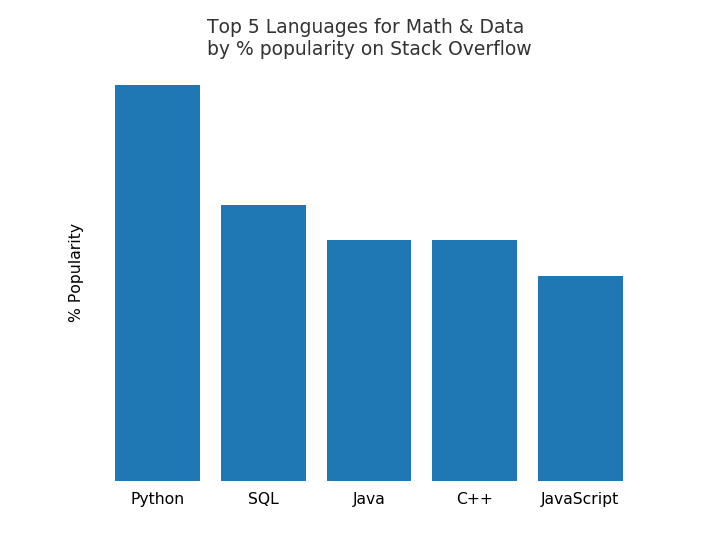

In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

# Change the color of Bar by index

<IPython.core.display.Javascript object>


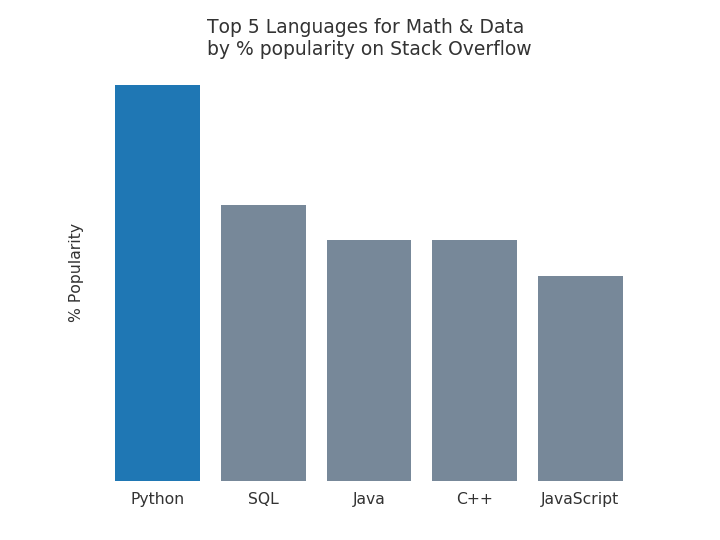

In [41]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar colors to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

# Label on top of Bar Chart (with percentage value)

<IPython.core.display.Javascript object>


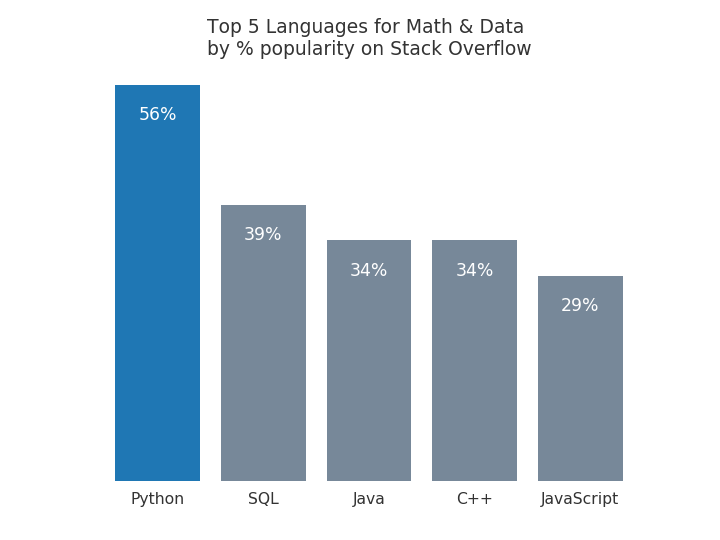

In [42]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()